##Importando as bibliotecas

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
#correçao para o openvc funcionar no colabs
import zipfile

cv2.__version__

'4.1.2'

In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.5.0'

## Conectando com o Drive e acessando os arquivos

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
path = "/content/gdrive/MyDrive/TP_PDI_Parte1.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")

In [5]:
base_imgs = '/content/TP_PDI/fer2013.zip'
zip_object = zipfile.ZipFile(file = base_imgs, mode = 'r')
zip_object.extractall('./')
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/TP_PDI/fer2013.zip' mode='r'>>

## Conferindo a base com fotos de expressões faciais



In [6]:
data = pd.read_csv('fer2013/fer2013.csv')
data.tail()#mostrar as ultimas posicoes

emotion                                             pixels        Usage
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

Text(0.5, 1.0, 'Imagens x emoções')

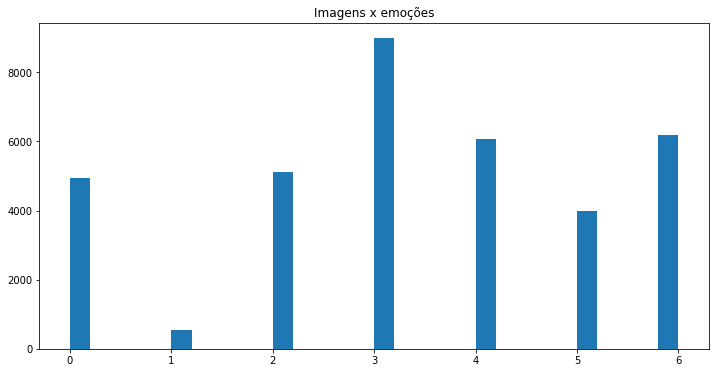

In [7]:
plt.figure(figsize=(12,6))
plt.hist(data['emotion'], bins = 30)
plt.title('Imagens x emoções')

# Classes: ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

##Pré-processamento

In [8]:
pixels = data['pixels'].tolist()
#tranformando para nunpy array
pixels[0]


'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

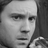

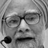

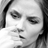

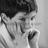

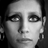

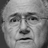

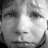

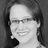

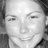

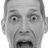

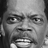

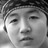

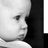

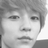

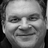

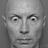

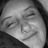

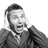

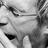

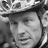

In [9]:
largura, altura = 48, 48 #as imagens de FER2013 estao assim
faces = []
amostras = 0
for pixel_sequence in pixels:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')]
  face = np.asarray(face).reshape(largura, altura)
  faces.append(face)

  if (amostras < 20):
    cv2_imshow(face)
  amostras += 1  

In [10]:
faces[0]

array([[ 70,  80,  82, ...,  52,  43,  41],
       [ 65,  61,  58, ...,  56,  52,  44],
       [ 50,  43,  54, ...,  49,  56,  47],
       ...,
       [ 91,  65,  42, ...,  72,  56,  43],
       [ 77,  82,  79, ..., 105,  70,  46],
       [ 77,  72,  84, ..., 106, 109,  82]])

In [11]:
print('Número total de imagens no dataset: ', str(len(faces)))

Número total de imagens no dataset:  35887


In [12]:
faces = np.asarray(faces)#transformando faces em um numpy array

In [13]:
faces.shape

(35887, 48, 48)

In [14]:
faces = np.expand_dims(faces, -1)# Adiciona o 1 no final para mostrar que temos apenas um canaldeixando no formato do tensoflow
faces.shape 

(35887, 48, 48, 1)

In [15]:
#Função para normalizar
def normalizar(x):
  x = x.astype('float32')#trasnforma de inteiro para float
  x = x / 255.0#deixa os valores entra 0 e 1
  return x

In [16]:
faces = normalizar(faces)

In [17]:
faces[0]

array([[[0.27450982],
        [0.3137255 ],
        [0.32156864],
        ...,
        [0.20392157],
        [0.16862746],
        [0.16078432]],

       [[0.25490198],
        [0.23921569],
        [0.22745098],
        ...,
        [0.21960784],
        [0.20392157],
        [0.17254902]],

       [[0.19607843],
        [0.16862746],
        [0.21176471],
        ...,
        [0.19215687],
        [0.21960784],
        [0.18431373]],

       ...,

       [[0.35686275],
        [0.25490198],
        [0.16470589],
        ...,
        [0.28235295],
        [0.21960784],
        [0.16862746]],

       [[0.3019608 ],
        [0.32156864],
        [0.30980393],
        ...,
        [0.4117647 ],
        [0.27450982],
        [0.18039216]],

       [[0.3019608 ],
        [0.28235295],
        [0.32941177],
        ...,
        [0.41568628],
        [0.42745098],
        [0.32156864]]], dtype=float32)

In [18]:
data['emotion']

0        0
1        0
2        2
3        4
4        6
        ..
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, Length: 35887, dtype: int64

In [19]:
emocoes = pd.get_dummies(data['emotion']).values

In [20]:
emocoes

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [21]:
emocoes[0]
#angry[1, 0, 0, 0, 0, 0, 0]

array([1, 0, 0, 0, 0, 0, 0], dtype=uint8)

##Imports do Tensorflow/Keras

In [22]:
from sklearn.model_selection import train_test_split 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

##Dividir em conjuntos para treinamento e validação

In [23]:
X_train, X_test, y_train, y_test = train_test_split(faces, emocoes, test_size = 0.1, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)

In [24]:
print('Número de imagens no conjunto de treinamento:', len(X_train)) #aprendizado
print('Número de imagens no conjunto de validação:', len(X_val)) #validação do treino
print('Número de imagens no conjunto de teste:', len(X_test)) #Confirmaçaõ do treino

Número de imagens no conjunto de treinamento: 29068
Número de imagens no conjunto de validação: 3230
Número de imagens no conjunto de teste: 3589


In [25]:
np.save('mod_xtest', X_test)
np.save('mod_ytest', y_test)

##Modelo1 (CNN)

In [26]:
num_features = 64 
num_labels = 7
batch_size = 64 #a cada 64 registros tem uma atualizaocao nos pesos
epochs = 100 
width, height = 48, 48

model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3,3), activation='relu',
                 input_shape=(width, height, 1), data_format = 'channels_last',
                 kernel_regularizer = l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 23, 23, 128)       5

##Compilando o modelo

In [27]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr = 0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics = ['accuracy'])

arquivo_modelo = 'modelo1.h5'
arquivo_modelo_json = 'modelo1.json'

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor = 0.9, patience=3, verbose = 1)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience = 8, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(arquivo_modelo, monitor='val_loss', verbose = 1, save_best_only=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Salvando o modelo

In [28]:
model_json = model.to_json()
with open(arquivo_modelo_json, 'w') as json_file:
  json_file.write(model_json)

##Treinando o modelo

In [29]:
history = model.fit(np.array(X_train), np.array(y_train),
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (np.array(X_val), np.array(y_val)),
                    shuffle=True,
                    callbacks=[lr_reducer, early_stopper, checkpointer])

Epoch 1/100
455/455 [==============================] - 53s 44ms/step - loss: 1.9920 - accuracy: 0.2192 - val_loss: 1.8307 - val_accuracy: 0.2471

Epoch 00001: val_loss improved from inf to 1.83068, saving model to modelo1.h5
Epoch 2/100
455/455 [==============================] - 19s 42ms/step - loss: 1.8325 - accuracy: 0.2478 - val_loss: 1.8089 - val_accuracy: 0.2539

Epoch 00002: val_loss improved from 1.83068 to 1.80889, saving model to modelo1.h5
Epoch 3/100
455/455 [==============================] - 20s 43ms/step - loss: 1.8086 - accuracy: 0.2516 - val_loss: 1.7795 - val_accuracy: 0.2517

Epoch 00003: val_loss improved from 1.80889 to 1.77953, saving model to modelo1.h5
Epoch 4/100
455/455 [==============================] - 20s 43ms/step - loss: 1.7432 - accuracy: 0.2903 - val_loss: 1.9098 - val_accuracy: 0.2471

Epoch 00004: val_loss did not improve from 1.77953
Epoch 5/100
455/455 [==============================] - 20s 43ms/step - loss: 1.6241 - accuracy: 0.3529 - val_loss: 1.584

In [30]:
print(history.history)

{'loss': [1.9919869899749756, 1.832457423210144, 1.8085956573486328, 1.7431598901748657, 1.624079704284668, 1.5257259607315063, 1.4617739915847778, 1.4121687412261963, 1.3733025789260864, 1.3355276584625244, 1.3023749589920044, 1.274465560913086, 1.2568589448928833, 1.2346335649490356, 1.2135952711105347, 1.1901224851608276, 1.1691033840179443, 1.1428097486495972, 1.1142503023147583, 1.0962353944778442, 1.076880931854248, 1.0630707740783691, 1.0424635410308838, 1.0228084325790405, 1.001346468925476, 0.9863250255584717, 0.9683117270469666, 0.9459134340286255, 0.9339036345481873, 0.9044632911682129, 0.8815029263496399, 0.868549108505249, 0.8508356213569641, 0.8264499306678772, 0.8059024810791016, 0.7827126979827881, 0.7694109678268433, 0.7446879148483276, 0.7262772917747498], 'accuracy': [0.21924452483654022, 0.24783267080783844, 0.251616895198822, 0.2902504503726959, 0.35289666056632996, 0.40164440870285034, 0.43215906620025635, 0.4556901156902313, 0.47148066759109497, 0.490470618009567

## Gráfico da melhora em cada etapa do treinamento

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


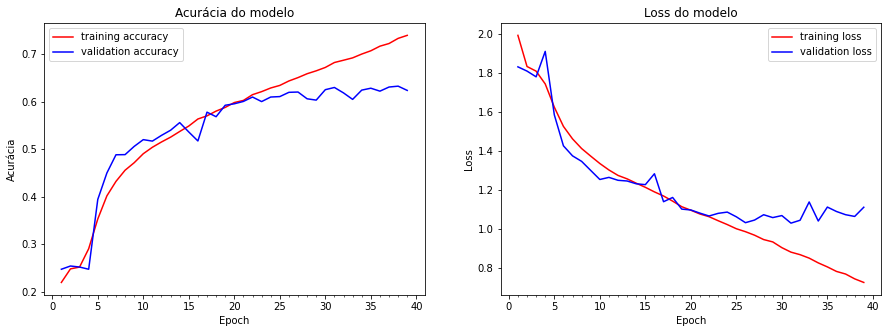

In [31]:
def plota_historico_modelo(historico_modelo):
  fig, axs = plt.subplots(1, 2, figsize=(15,5))
  axs[0].plot(range(1, len(historico_modelo.history['accuracy']) + 1), historico_modelo.history['accuracy'], 'r')
  axs[0].plot(range(1, len(historico_modelo.history['val_accuracy']) + 1), historico_modelo.history['val_accuracy'], 'b')
  axs[0].set_title('Acurácia do modelo')
  axs[0].set_ylabel('Acurácia')
  axs[0].set_xlabel('Epoch')
  axs[0].set_xticks(np.arange(1, len(historico_modelo.history['accuracy']) + 1),
                    len(historico_modelo.history['accuracy']) / 10)
  axs[0].legend(['training accuracy', 'validation accuracy'], loc = 'best')

  axs[1].plot(range(1, len(historico_modelo.history['loss']) + 1), historico_modelo.history['loss'], 'r')
  axs[1].plot(range(1, len(historico_modelo.history['val_loss']) + 1), historico_modelo.history['val_loss'], 'b')
  axs[1].set_title('Loss do modelo')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].set_xticks(np.arange(1, len(historico_modelo.history['loss']) + 1),
                    len(historico_modelo.history['loss']) / 10)
  axs[1].legend(['training loss', 'validation loss'], loc = 'best')
  fig.savefig('historico_modelo1.png')

plota_historico_modelo(history) 

###Acurácia do modelo

In [32]:
scores = model.evaluate(np.array(X_test), np.array(y_test), batch_size = batch_size)

57/57 [==============================] - 1s 19ms/step - loss: 1.1461 - accuracy: 0.6233


In [33]:
scores

[1.146093487739563, 0.623293399810791]

In [34]:
print('Acurácia: ' + str(scores[1]))
print('Erro: ' + str(scores[0]))

Acurácia: 0.623293399810791
Erro: 1.146093487739563


## Matriz de confusão

In [35]:
true_y = []
pred_y = []
x = np.load('mod_xtest.npy')
y = np.load('mod_ytest.npy')

In [36]:
x[0]

array([[[0.5568628 ],
        [0.5803922 ],
        [0.59607846],
        ...,
        [0.3529412 ],
        [0.3529412 ],
        [0.3647059 ]],

       [[0.5568628 ],
        [0.5764706 ],
        [0.5921569 ],
        ...,
        [0.33333334],
        [0.36078432],
        [0.40392157]],

       [[0.5529412 ],
        [0.5686275 ],
        [0.5921569 ],
        ...,
        [0.3372549 ],
        [0.32156864],
        [0.37254903]],

       ...,

       [[0.0627451 ],
        [0.08235294],
        [0.07058824],
        ...,
        [0.08235294],
        [0.09019608],
        [0.11372549]],

       [[0.05490196],
        [0.0627451 ],
        [0.05490196],
        ...,
        [0.07450981],
        [0.07843138],
        [0.09803922]],

       [[0.04705882],
        [0.04705882],
        [0.04705882],
        ...,
        [0.06666667],
        [0.07450981],
        [0.09411765]]], dtype=float32)

In [37]:
y[0]

array([0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [38]:
json_file = open(arquivo_modelo_json, 'r')
loaded_model_json = json_file.read()
json_file.close()

In [39]:
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(arquivo_modelo)

In [40]:
y_pred = loaded_model.predict(x)

In [41]:
y_pred[0]

array([0.06080518, 0.0011806 , 0.0599476 , 0.6383583 , 0.09161599,
       0.02685925, 0.12123304], dtype=float32)

In [42]:
yp = y_pred.tolist()
yt = y.tolist()
count = 0

In [43]:
len(y)

3589

In [44]:
for i in range(len(y)):
  yy = max(yp[i])
  yyt = max(yt[i])
  pred_y.append(yp[i].index(yy))
  true_y.append(yt[i].index(yyt))
  if (yp[i].index(yy) == yt[i].index(yyt)):
    count += 1

acc = (count / len(y)) * 100

In [45]:
print('Acurácia no conjunto de teste: ' + str(acc))

Acurácia no conjunto de teste: 61.6049038729451


In [46]:
np.save('truey_modelo1', true_y)
np.save('predy_modelo1', pred_y)

## Gerando a Matriz de Confusão

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
y_true = np.load('truey_modelo1.npy')
y_pred = np.load('predy_modelo1.npy')

In [49]:
cm = confusion_matrix(y_true, y_pred)
expressoes = ['Raiva', 'Nojo', 'Medo', 'Feliz', 'Triste', 'Surpreso', 'Neutro']
titulo = 'Matriz de Confusão'
print(cm)

[[260   3  44  24  55  10 102]
 [ 35   5   4   1   4   0   3]
 [ 84   1 187  25 119  56  73]
 [ 36   0  11 738  18  16  62]
 [ 57   0  41  24 282   2 182]
 [ 13   0  62  42   5 280  12]
 [ 17   0  18  49  61   7 459]]


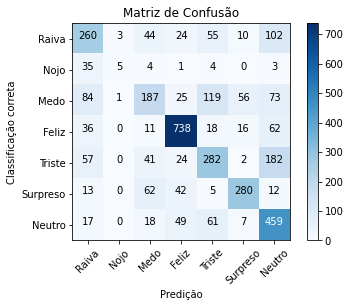

In [50]:
import itertools
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(titulo)
plt.colorbar()
tick_marks = np.arange(len(expressoes))
plt.xticks(tick_marks, expressoes, rotation = 45)
plt.yticks(tick_marks, expressoes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')

plt.ylabel('Classificação correta')
plt.xlabel('Predição')
plt.savefig('matriz_confusao_modelo1.png')

## Teste do Modelo1

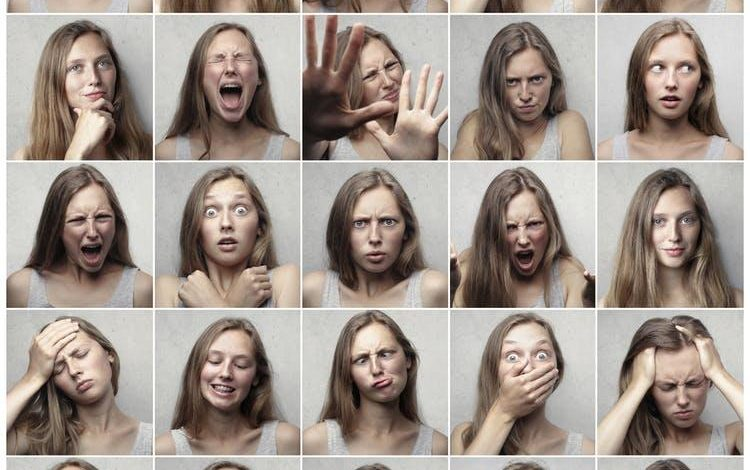

In [51]:
imagem = cv2.imread('/content/TP_PDI/testes/teste1.jpg')
cv2_imshow(imagem)

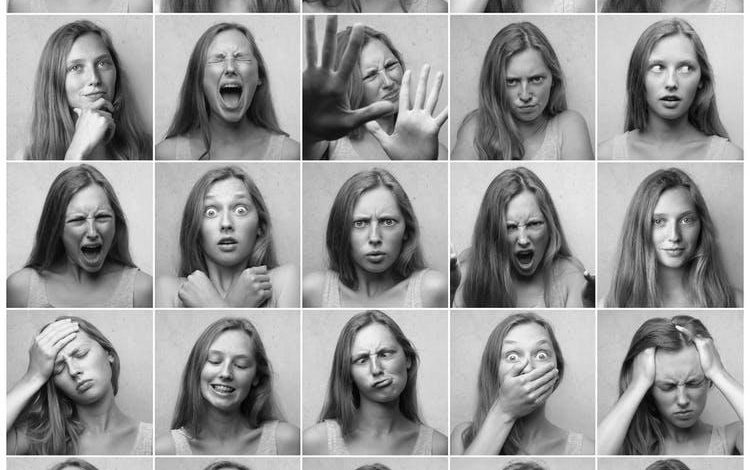

In [52]:
original = imagem.copy()
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [53]:
face_cascade = cv2.CascadeClassifier('/content/TP_PDI/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 3)

In [54]:
print('Número total de imagens no dataset: ', str(len(faces)))

Número total de imagens no dataset:  14


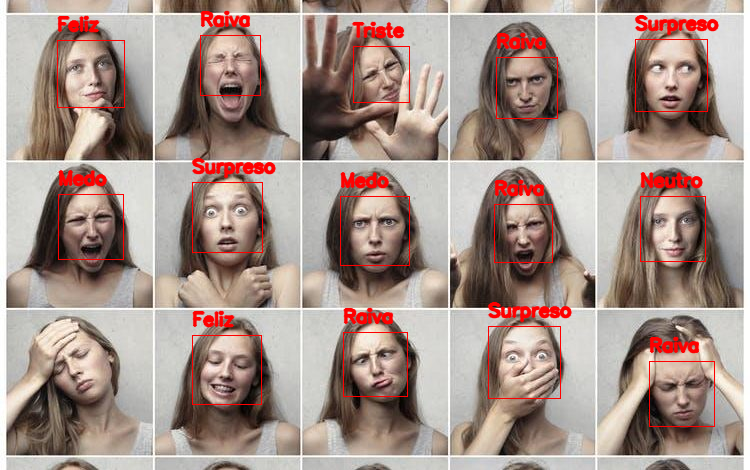

In [55]:
for (x, y, w, h) in faces:
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 1)
  roi_gray = gray[y:y + h, x:x + w]
  roi_gray = roi_gray.astype('float') / 255.0
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  prediction = loaded_model.predict(cropped_img)[0]
  cv2.putText(original, expressoes[int(np.argmax(prediction))], (x, y - 10),
              cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2, cv2.LINE_AA)

cv2_imshow(original)

##Modelo2 (CNN)

In [56]:
num_features = 32
num_classes = 7
width, height = 48, 48
batch_size = 16
epochs = 100

model = Sequential()

model.add(Conv2D(num_features, (3, 3), padding = 'same', kernel_initializer="he_normal",
                 input_shape = (width, height, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(num_features, (3, 3), padding = "same", kernel_initializer="he_normal", 
                 input_shape = (width, height, 1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*num_features, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*2*num_features, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*2*2*num_features, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(2*num_features, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2*num_features, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)       

##Compilando o modelo

In [57]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])
arquivo_modelo = "modelo2.h5" # arquivo do modelo
arquivo_modelo_json = "modelo2.json" # arquivo do json, para salvar a arquitetura
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(arquivo_modelo, monitor='val_loss', verbose=1, save_best_only=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


##Salvando o Modelo

In [58]:
model_json = model.to_json()
with open(arquivo_modelo_json, "w") as json_file:
    json_file.write(model_json)

##Treinando o modelo

In [60]:
history = model.fit(np.array(X_train), np.array(y_train),
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (np.array(X_val), np.array(y_val)),
                    shuffle=True,
                    callbacks=[lr_reducer, early_stopper, checkpointer])

Epoch 1/100
1817/1817 [==============================] - 17s 9ms/step - loss: 1.7378 - accuracy: 0.3310 - val_loss: 1.4113 - val_accuracy: 0.4635

Epoch 00001: val_loss improved from inf to 1.41132, saving model to modelo2.h5
Epoch 2/100
1817/1817 [==============================] - 17s 9ms/step - loss: 1.4208 - accuracy: 0.4575 - val_loss: 1.2941 - val_accuracy: 0.5139

Epoch 00002: val_loss improved from 1.41132 to 1.29411, saving model to modelo2.h5
Epoch 3/100
1817/1817 [==============================] - 17s 9ms/step - loss: 1.3139 - accuracy: 0.5085 - val_loss: 1.1775 - val_accuracy: 0.5573

Epoch 00003: val_loss improved from 1.29411 to 1.17745, saving model to modelo2.h5
Epoch 4/100
1817/1817 [==============================] - 17s 9ms/step - loss: 1.2443 - accuracy: 0.5380 - val_loss: 1.1327 - val_accuracy: 0.5901

Epoch 00004: val_loss improved from 1.17745 to 1.13268, saving model to modelo2.h5
Epoch 5/100
1817/1817 [==============================] - 17s 9ms/step - loss: 1.1797

In [61]:
print(history.history)

{'loss': [1.7378171682357788, 1.420841097831726, 1.3139230012893677, 1.2442535161972046, 1.1797326803207397, 1.1205471754074097, 1.0690672397613525, 1.0074399709701538, 0.961437463760376, 0.9188150763511658, 0.8588125109672546, 0.8070219159126282, 0.7652813196182251, 0.7264581918716431, 0.6607905626296997, 0.6213688850402832, 0.5862269997596741, 0.536676824092865, 0.5120889544487], 'accuracy': [0.3310169279575348, 0.45747900009155273, 0.5084972977638245, 0.5380486845970154, 0.5632654428482056, 0.5908558964729309, 0.6118068099021912, 0.6349250078201294, 0.6574583649635315, 0.6749690175056458, 0.7021467089653015, 0.715494692325592, 0.7332462072372437, 0.7493463754653931, 0.7756639719009399, 0.7910416722297668, 0.7999862432479858, 0.8177721500396729, 0.8289183974266052], 'val_loss': [1.4113166332244873, 1.2941060066223145, 1.1774547100067139, 1.1326829195022583, 1.0762028694152832, 1.0487689971923828, 1.0378925800323486, 1.008553147315979, 1.019944667816162, 1.0242974758148193, 1.00688958

## Gráfico da melhora em cada etapa do treinamento

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


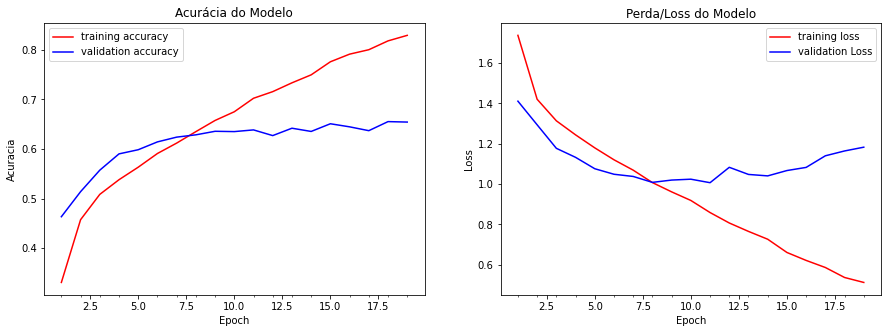

In [62]:
def plota_historico_modelo(historico_modelo):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(historico_modelo.history['accuracy'])+1),
                historico_modelo.history['accuracy'],'r')
    axs[0].plot(range(1,len(historico_modelo.history['val_accuracy'])+1),
                historico_modelo.history['val_accuracy'],'b')
    axs[0].set_title('Acurácia do Modelo')
    axs[0].set_ylabel('Acuracia')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(historico_modelo.history['accuracy'])+1),
                      len(historico_modelo.history['accuracy'])/10)
    axs[0].legend(['training accuracy', 'validation accuracy'], loc='best')

    axs[1].plot(range(1,len(historico_modelo.history['loss'])+1),
                historico_modelo.history['loss'],'r')
    axs[1].plot(range(1,len(historico_modelo.history['val_loss'])+1),
                historico_modelo.history['val_loss'],'b')
    axs[1].set_title('Perda/Loss do Modelo')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(historico_modelo.history['loss'])+1),
                      len(historico_modelo.history['loss'])/10)
    axs[1].legend(['training loss', 'validation Loss'], loc='best')
    fig.savefig('historico_modelo2.png')
    plt.show()

plota_historico_modelo(history)

###Acurácia do modelo

In [63]:
scores = model.evaluate(np.array(X_test), np.array(y_test), batch_size=batch_size)

225/225 [==============================] - 1s 5ms/step - loss: 1.2197 - accuracy: 0.6431


In [64]:
scores

[1.2196531295776367, 0.6430760622024536]

In [65]:
print('Acurácia: ' + str(scores[1]))
print('Erro: ' + str(scores[0]))

Acurácia: 0.6430760622024536
Erro: 1.2196531295776367


## Matriz de confusão

In [66]:
true_y=[]
pred_y=[]
x = np.load('mod_xtest.npy')
y = np.load('mod_ytest.npy')
json_file = open(arquivo_modelo_json, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(arquivo_modelo)
y_pred= loaded_model.predict(x)
yp = y_pred.tolist()
yt = y.tolist()
count = 0
for i in range(len(y)):
    yy = max(yp[i])
    yyt = max(yt[i])
    pred_y.append(yp[i].index(yy))
    true_y.append(yt[i].index(yyt))
    if(yp[i].index(yy)== yt[i].index(yyt)):
        count+=1
acc = (count/len(y))*100
np.save('truey__mod01', true_y)
np.save('predy__mod01', pred_y)
print("Acurácia no conjunto de testes: "+str(acc)+"%")

Acurácia no conjunto de testes: 64.50264697687378%


## Gerando a Matriz de Confusão

In [67]:
from sklearn.metrics import confusion_matrix
y_true = np.load('truey__mod01.npy')
y_pred = np.load('predy__mod01.npy')
cm = confusion_matrix(y_true, y_pred)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]
titulo='Matriz de Confusão'
print(cm)

[[249   6  47  26  89  13  68]
 [ 19  22   2   1   6   1   1]
 [ 48   2 213  28 146  62  46]
 [ 26   0  12 765  23  15  40]
 [ 44   1  50  28 349   5 111]
 [ 11   0  43  34   5 310  11]
 [ 31   1  25  50  90   7 407]]


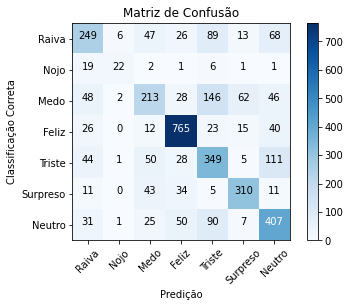

In [68]:
import itertools
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(titulo)
plt.colorbar()
tick_marks = np.arange(len(expressoes))
plt.xticks(tick_marks, expressoes, rotation=45)
plt.yticks(tick_marks, expressoes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Classificação Correta')
plt.xlabel('Predição')
plt.savefig('matriz_confusao_modelo2.png')
plt.show()

## Teste do Modelo2

In [69]:
imagem = cv2.imread('/content/TP_PDI/testes/teste1.jpg')
original = imagem.copy()
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

In [70]:
face_cascade = cv2.CascadeClassifier('/content/TP_PDI/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 3)

In [71]:
print('Número total de imagens no dataset: ', str(len(faces)))

Número total de imagens no dataset:  14


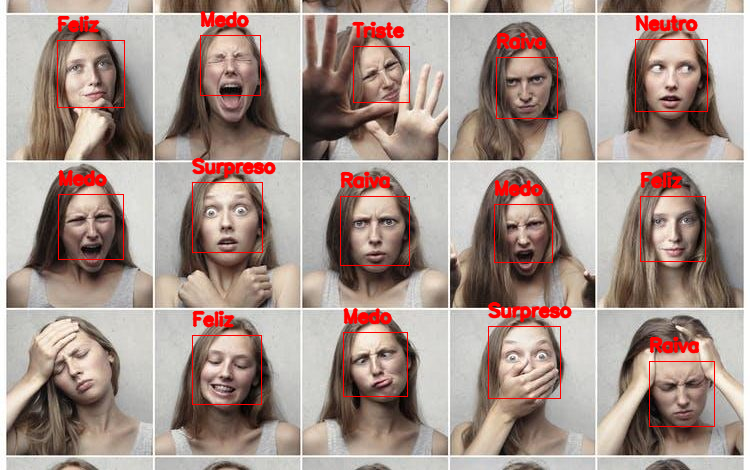

In [72]:
for (x, y, w, h) in faces:
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 1)
  roi_gray = gray[y:y + h, x:x + w]
  roi_gray = roi_gray.astype('float') / 255.0
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  prediction = loaded_model.predict(cropped_img)[0]
  cv2.putText(original, expressoes[int(np.argmax(prediction))], (x, y - 10),
              cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2, cv2.LINE_AA)

cv2_imshow(original)

##Modelo3 (CNN)

In [73]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 100
width, height = 48, 48

model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', input_shape=(width, height, 1), data_format='channels_last', kernel_regularizer=l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_17 (Batc (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_18 (Batc (None, 23, 23, 128)      

##Compilando o modelo

In [74]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])
arquivo_modelo = "modelo3.h5"
arquivo_modelo_json = "modelo3.json"
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(arquivo_modelo, monitor='val_loss', verbose=1, save_best_only=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Salvando o modelo

In [75]:
model_json = model.to_json()
with open(arquivo_modelo_json, "w") as json_file:
    json_file.write(model_json)

##Treinando o modelo

In [76]:
history = model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_val), np.array(y_val)),
          shuffle=True,
          callbacks=[lr_reducer, early_stopper, checkpointer])

Epoch 1/100
455/455 [==============================] - 21s 44ms/step - loss: 1.9918 - accuracy: 0.2166 - val_loss: 1.8344 - val_accuracy: 0.2471

Epoch 00001: val_loss improved from inf to 1.83445, saving model to modelo3.h5
Epoch 2/100
455/455 [==============================] - 20s 44ms/step - loss: 1.8379 - accuracy: 0.2447 - val_loss: 1.8133 - val_accuracy: 0.2471

Epoch 00002: val_loss improved from 1.83445 to 1.81334, saving model to modelo3.h5
Epoch 3/100
455/455 [==============================] - 20s 45ms/step - loss: 1.8205 - accuracy: 0.2494 - val_loss: 1.8301 - val_accuracy: 0.2474

Epoch 00003: val_loss did not improve from 1.81334
Epoch 4/100
455/455 [==============================] - 20s 45ms/step - loss: 1.7973 - accuracy: 0.2584 - val_loss: 1.7854 - val_accuracy: 0.2684

Epoch 00004: val_loss improved from 1.81334 to 1.78536, saving model to modelo3.h5
Epoch 5/100
455/455 [==============================] - 20s 45ms/step - loss: 1.7206 - accuracy: 0.2970 - val_loss: 1.672

In [77]:
print(history.history)

{'loss': [1.9917556047439575, 1.837860107421875, 1.8205318450927734, 1.7973259687423706, 1.7205679416656494, 1.6177935600280762, 1.5210850238800049, 1.4690982103347778, 1.423568844795227, 1.37614905834198, 1.346325397491455, 1.3146570920944214, 1.2843611240386963, 1.2649599313735962, 1.2225351333618164, 1.2029728889465332, 1.1719647645950317, 1.1525737047195435, 1.1345911026000977, 1.1060571670532227, 1.091470718383789, 1.0683016777038574, 1.05336594581604, 1.02608060836792, 1.020143747329712, 0.9816325902938843, 0.9539062976837158, 0.9377446174621582, 0.9169430732727051, 0.889100193977356, 0.8743172883987427, 0.8519426584243774, 0.8278272747993469, 0.8221848607063293, 0.8017975687980652, 0.77747642993927, 0.7551748156547546, 0.7428757548332214, 0.7179240584373474, 0.6946796774864197], 'accuracy': [0.2165955752134323, 0.2447364777326584, 0.24941515922546387, 0.25842851400375366, 0.2969932556152344, 0.35836657881736755, 0.40429338812828064, 0.4300605356693268, 0.4539012014865875, 0.4746

## Gráfico da melhora em cada etapa do treinamento

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


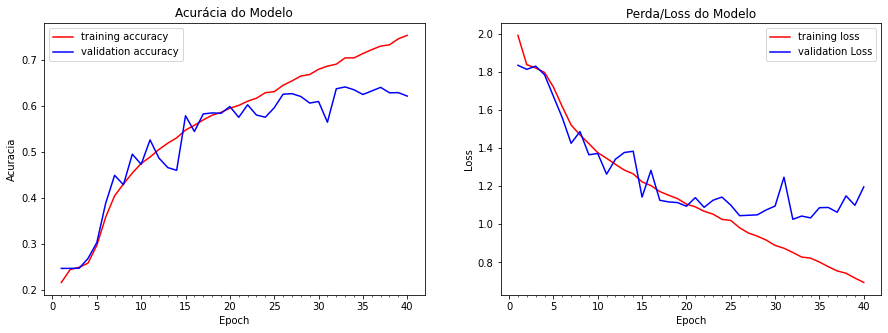

In [78]:
def plota_historico_modelo(historico_modelo):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(historico_modelo.history['accuracy'])+1),
                historico_modelo.history['accuracy'],'r')
    axs[0].plot(range(1,len(historico_modelo.history['val_accuracy'])+1),
                historico_modelo.history['val_accuracy'],'b')
    axs[0].set_title('Acurácia do Modelo')
    axs[0].set_ylabel('Acuracia')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(historico_modelo.history['accuracy'])+1),
                      len(historico_modelo.history['accuracy'])/10)
    axs[0].legend(['training accuracy', 'validation accuracy'], loc='best')

    axs[1].plot(range(1,len(historico_modelo.history['loss'])+1),
                historico_modelo.history['loss'],'r')
    axs[1].plot(range(1,len(historico_modelo.history['val_loss'])+1),
                historico_modelo.history['val_loss'],'b')
    axs[1].set_title('Perda/Loss do Modelo')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(historico_modelo.history['loss'])+1),
                      len(historico_modelo.history['loss'])/10)
    axs[1].legend(['training loss', 'validation Loss'], loc='best')
    fig.savefig('historico_modelo3.png')
    plt.show()

plota_historico_modelo(history)

###Acurácia do modelo

In [79]:
scores = model.evaluate(np.array(X_test), np.array(y_test), batch_size = batch_size)
scores
print('Acurácia: ' + str(scores[1]))
print('Erro: ' + str(scores[0]))

57/57 [==============================] - 1s 15ms/step - loss: 1.2169 - accuracy: 0.6141
Acurácia: 0.6140986084938049
Erro: 1.2168720960617065


## Matriz de confusão

In [80]:
true_y=[]
pred_y=[]
x = np.load('mod_xtest.npy')
y = np.load('mod_ytest.npy')
json_file = open(arquivo_modelo_json, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(arquivo_modelo)
y_pred= loaded_model.predict(x)
yp = y_pred.tolist()
yt = y.tolist()
count = 0
for i in range(len(y)):
    yy = max(yp[i])
    yyt = max(yt[i])
    pred_y.append(yp[i].index(yy))
    true_y.append(yt[i].index(yyt))
    if(yp[i].index(yy)== yt[i].index(yyt)):
        count+=1
acc = (count/len(y))*100
np.save('truey__mod01', true_y)
np.save('predy__mod01', pred_y)
print("Acurácia no conjunto de testes: "+str(acc)+"%")

Acurácia no conjunto de testes: 62.329339648927274%


## Gerando a Matriz de Confusão

In [81]:
from sklearn.metrics import confusion_matrix
y_true = np.load('truey__mod01.npy')
y_pred = np.load('predy__mod01.npy')
cm = confusion_matrix(y_true, y_pred)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]
titulo='Matriz de Confusão'
print(cm)

[[275   0  20  24  87  16  76]
 [ 29  12   2   0   8   0   1]
 [ 81   1 136  28 173  60  66]
 [ 28   0   4 746  28  12  63]
 [ 40   0  22  29 363   2 132]
 [ 19   0  40  46   6 283  20]
 [ 30   0  13  50  90   6 422]]


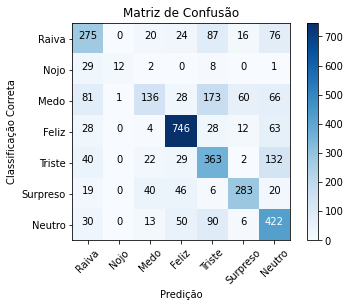

In [82]:
import itertools
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(titulo)
plt.colorbar()
tick_marks = np.arange(len(expressoes))
plt.xticks(tick_marks, expressoes, rotation=45)
plt.yticks(tick_marks, expressoes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Classificação Correta')
plt.xlabel('Predição')
plt.savefig('matriz_confusao_modelo3.png')
plt.show()

## Teste do Modelo3

In [83]:

imagem = cv2.imread('/content/TP_PDI/testes/teste1.jpg')
original = imagem.copy()
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

In [84]:
face_cascade = cv2.CascadeClassifier('/content/TP_PDI/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 3)

In [86]:
print('Número total de imagens no dataset: ', str(len(faces)))

Número total de imagens no dataset:  14


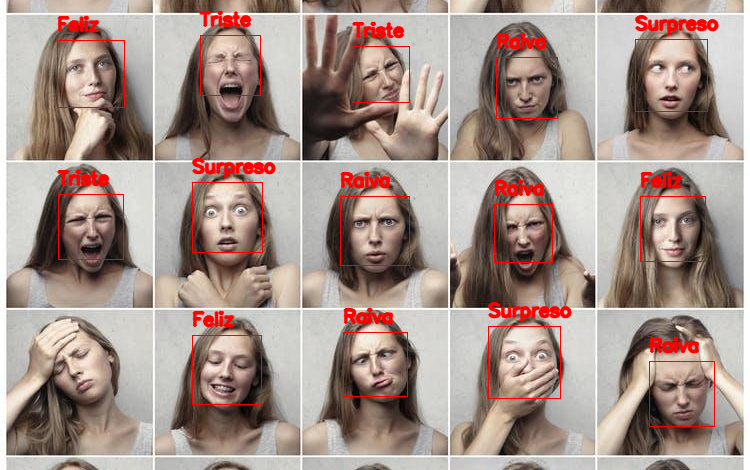

In [87]:
for (x, y, w, h) in faces:
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 1)
  roi_gray = gray[y:y + h, x:x + w]
  roi_gray = roi_gray.astype('float') / 255.0
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  prediction = loaded_model.predict(cropped_img)[0]
  cv2.putText(original, expressoes[int(np.argmax(prediction))], (x, y - 10),
              cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2, cv2.LINE_AA)

cv2_imshow(original)

##Modelo4 (CNN)

In [88]:
from tensorflow.keras import optimizers
epochs = 100
batch_size = 64
learning_rate = 0.001

model = Sequential()
    
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))
    
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
    
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
    
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
    
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
adam = optimizers.Adam(lr = learning_rate)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_24 (Batc (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 23, 23, 128)       73856     
_________________________________________________________________
batch_normalization_25 (Batc (None, 23, 23, 128)      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


##Compilando o modelo

In [89]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])
arquivo_modelo = "modelo4.h5" # arquivo do modelo
arquivo_modelo_json = "modelo4.json" # arquivo do json, para salvar a arquitetura
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(arquivo_modelo, monitor='val_loss', verbose=1, save_best_only=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Salvando o modelo

In [90]:
model_json = model.to_json()
with open(arquivo_modelo_json, "w") as json_file:
    json_file.write(model_json)

##Treinando o modelo

In [91]:
history = model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_val), np.array(y_val)),
          shuffle=True,
          callbacks=[lr_reducer, early_stopper, checkpointer])

Epoch 1/100
455/455 [==============================] - 29s 62ms/step - loss: 2.0927 - accuracy: 0.2022 - val_loss: 1.8697 - val_accuracy: 0.2471

Epoch 00001: val_loss improved from inf to 1.86971, saving model to modelo4.h5
Epoch 2/100
455/455 [==============================] - 28s 62ms/step - loss: 1.8577 - accuracy: 0.2408 - val_loss: 1.8355 - val_accuracy: 0.2471

Epoch 00002: val_loss improved from 1.86971 to 1.83546, saving model to modelo4.h5
Epoch 3/100
455/455 [==============================] - 29s 63ms/step - loss: 1.8374 - accuracy: 0.2483 - val_loss: 1.8314 - val_accuracy: 0.2471

Epoch 00003: val_loss improved from 1.83546 to 1.83138, saving model to modelo4.h5
Epoch 4/100
455/455 [==============================] - 29s 63ms/step - loss: 1.8298 - accuracy: 0.2500 - val_loss: 1.8193 - val_accuracy: 0.2471

Epoch 00004: val_loss improved from 1.83138 to 1.81934, saving model to modelo4.h5
Epoch 5/100
455/455 [==============================] - 29s 63ms/step - loss: 1.8222 - ac

In [92]:
print(history.history)

{'loss': [2.092740535736084, 1.8577431440353394, 1.8373655080795288, 1.82982337474823, 1.8221853971481323, 1.814142107963562, 1.8081177473068237, 1.7971073389053345, 1.7683956623077393, 1.7391669750213623, 1.6864961385726929, 1.6107860803604126, 1.5533676147460938, 1.5070523023605347, 1.4727457761764526, 1.444023609161377, 1.422252893447876, 1.3991944789886475, 1.3832378387451172, 1.3622493743896484, 1.3538258075714111, 1.3239128589630127, 1.2946397066116333, 1.2638615369796753, 1.244350790977478, 1.23356294631958, 1.2044740915298462, 1.171021580696106, 1.1531546115875244, 1.1427645683288574, 1.1240671873092651, 1.0902092456817627, 1.076917290687561, 1.0656107664108276, 1.050378680229187, 1.0302863121032715, 0.9968491196632385, 0.976358950138092, 0.9689732789993286, 0.9435429573059082, 0.9294508099555969, 0.9166553020477295, 0.8733687400817871, 0.8691784739494324, 0.8549641966819763, 0.825300395488739, 0.8061680793762207], 'accuracy': [0.20218108594417572, 0.24078023433685303, 0.248314

## Gráfico da melhora em cada etapa do treinamento

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


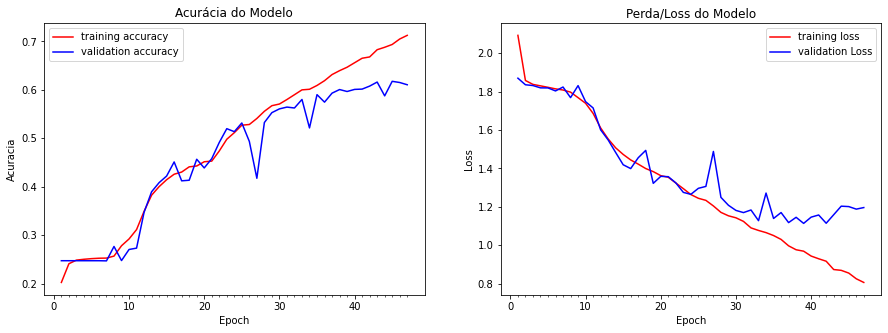

In [93]:
def plota_historico_modelo(historico_modelo):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(historico_modelo.history['accuracy'])+1),
                historico_modelo.history['accuracy'],'r')
    axs[0].plot(range(1,len(historico_modelo.history['val_accuracy'])+1),
                historico_modelo.history['val_accuracy'],'b')
    axs[0].set_title('Acurácia do Modelo')
    axs[0].set_ylabel('Acuracia')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(historico_modelo.history['accuracy'])+1),
                      len(historico_modelo.history['accuracy'])/10)
    axs[0].legend(['training accuracy', 'validation accuracy'], loc='best')

    axs[1].plot(range(1,len(historico_modelo.history['loss'])+1),
                historico_modelo.history['loss'],'r')
    axs[1].plot(range(1,len(historico_modelo.history['val_loss'])+1),
                historico_modelo.history['val_loss'],'b')
    axs[1].set_title('Perda/Loss do Modelo')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(historico_modelo.history['loss'])+1),
                      len(historico_modelo.history['loss'])/10)
    axs[1].legend(['training loss', 'validation Loss'], loc='best')
    fig.savefig('historico_modelo4.png')
    plt.show()

plota_historico_modelo(history)


###Acurácia do modelo

In [94]:
scores = model.evaluate(np.array(X_test), np.array(y_test), batch_size = batch_size)
scores
print('Acurácia: ' + str(scores[1]))
print('Erro: ' + str(scores[0]))

57/57 [==============================] - 1s 19ms/step - loss: 1.2286 - accuracy: 0.6077
Acurácia: 0.607690155506134
Erro: 1.2286310195922852


## Matriz de confusão

In [95]:
true_y=[]
pred_y=[]
x = np.load('mod_xtest.npy')
y = np.load('mod_ytest.npy')
json_file = open(arquivo_modelo_json, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(arquivo_modelo)
y_pred= loaded_model.predict(x)
yp = y_pred.tolist()
yt = y.tolist()
count = 0
for i in range(len(y)):
    yy = max(yp[i])
    yyt = max(yt[i])
    pred_y.append(yp[i].index(yy))
    true_y.append(yt[i].index(yyt))
    if(yp[i].index(yy)== yt[i].index(yyt)):
        count+=1
acc = (count/len(y))*100
np.save('truey__mod01', true_y)
np.save('predy__mod01', pred_y)
print("Acurácia no conjunto de testes: "+str(acc)+"%")

Acurácia no conjunto de testes: 59.3201448871552%


## Gerando a Matriz de Confusão

In [96]:
from sklearn.metrics import confusion_matrix
y_true = np.load('truey__mod01.npy')
y_pred = np.load('predy__mod01.npy')
cm = confusion_matrix(y_true, y_pred)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]
titulo='Matriz de Confusão'
print(cm)

[[198   0  51  23 144   7  75]
 [ 31   0   3   1  15   1   1]
 [ 63   0 152  26 166  67  71]
 [ 15   0  14 761  29  13  49]
 [ 21   0  40  33 342   2 150]
 [  7   0  69  45   8 266  19]
 [  7   0  29  45 116   4 410]]


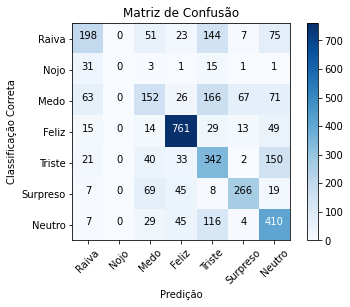

In [97]:
import itertools
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(titulo)
plt.colorbar()
tick_marks = np.arange(len(expressoes))
plt.xticks(tick_marks, expressoes, rotation=45)
plt.yticks(tick_marks, expressoes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Classificação Correta')
plt.xlabel('Predição')
plt.savefig('matriz_confusao_modelo4.png')
plt.show()

## Teste do Modelo4

In [98]:

imagem = cv2.imread('/content/TP_PDI/testes/teste1.jpg')
original = imagem.copy()
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

In [99]:
face_cascade = cv2.CascadeClassifier('/content/TP_PDI/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 3)

In [100]:
print('Número total de imagens no dataset: ', str(len(faces)))

Número total de imagens no dataset:  14


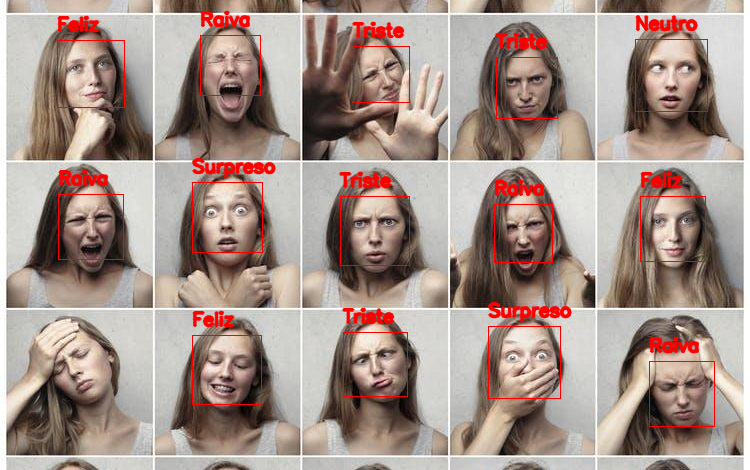

In [101]:
for (x, y, w, h) in faces:
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 1)
  roi_gray = gray[y:y + h, x:x + w]
  roi_gray = roi_gray.astype('float') / 255.0
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  prediction = loaded_model.predict(cropped_img)[0]
  cv2.putText(original, expressoes[int(np.argmax(prediction))], (x, y - 10),
              cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2, cv2.LINE_AA)

cv2_imshow(original)

##Modelo5 (CNN)

In [102]:
batch_size = 256
epochs = 100
width, height = 48, 48
num_labels = 7

model = Sequential() 

model.add(Conv2D(20, (3, 3), padding='same', activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(30, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(40, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(50, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(60, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(70, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(80, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(90, (3, 3), padding='same', activation='relu'))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dense(512, activation='relu'))

model.add(Dense(num_labels, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 48, 48, 20)        200       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 48, 48, 30)        5430      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 30)        0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 24, 24, 30)        120       
_________________________________________________________________
dropout_28 (Dropout)         (None, 24, 24, 30)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 24, 24, 40)        10840     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 50)       

##Compilando o modelo

In [103]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])
arquivo_modelo = "modelo5.h5" # arquivo do modelo
arquivo_modelo_json = "modelo5.json" # arquivo do json, para salvar a arquitetura
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(arquivo_modelo, monitor='val_loss', verbose=1, save_best_only=True)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Salvando o modelo

In [104]:
model_json = model.to_json()
with open(arquivo_modelo_json, "w") as json_file:
    json_file.write(model_json)

##Treinando o modelo

In [105]:
history = model.fit(np.array(X_train), np.array(y_train),
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(np.array(X_val), np.array(y_val)),
          shuffle=True,
          callbacks=[lr_reducer, early_stopper, checkpointer])

Epoch 1/100
114/114 [==============================] - 7s 47ms/step - loss: 1.7641 - accuracy: 0.2828 - val_loss: 1.7977 - val_accuracy: 0.2477

Epoch 00001: val_loss improved from inf to 1.79770, saving model to modelo5.h5
Epoch 2/100
114/114 [==============================] - 4s 39ms/step - loss: 1.5203 - accuracy: 0.4043 - val_loss: 1.8671 - val_accuracy: 0.1697

Epoch 00002: val_loss did not improve from 1.79770
Epoch 3/100
114/114 [==============================] - 4s 39ms/step - loss: 1.3604 - accuracy: 0.4705 - val_loss: 1.6885 - val_accuracy: 0.3517

Epoch 00003: val_loss improved from 1.79770 to 1.68848, saving model to modelo5.h5
Epoch 4/100
114/114 [==============================] - 4s 39ms/step - loss: 1.2609 - accuracy: 0.5146 - val_loss: 1.3553 - val_accuracy: 0.4684

Epoch 00004: val_loss improved from 1.68848 to 1.35525, saving model to modelo5.h5
Epoch 5/100
114/114 [==============================] - 4s 39ms/step - loss: 1.1817 - accuracy: 0.5447 - val_loss: 1.2574 - v

In [106]:
print(history.history)

{'loss': [1.764095664024353, 1.520286202430725, 1.3604389429092407, 1.2608613967895508, 1.181712031364441, 1.115459680557251, 1.0583218336105347, 0.9971581101417542, 0.9288923144340515, 0.8658214807510376, 0.8001657724380493, 0.7117178440093994, 0.623323380947113, 0.5630242228507996, 0.4727632403373718, 0.4152609407901764], 'accuracy': [0.28275078535079956, 0.40425896644592285, 0.4705173969268799, 0.5145865082740784, 0.5447227358818054, 0.575374960899353, 0.5931952595710754, 0.6197192668914795, 0.648961067199707, 0.6734209656715393, 0.6998417377471924, 0.73527592420578, 0.7685771584510803, 0.7927961945533752, 0.8275423049926758, 0.8498692512512207], 'val_loss': [1.7977004051208496, 1.8671330213546753, 1.6884804964065552, 1.3552515506744385, 1.257417917251587, 1.2249077558517456, 1.1624706983566284, 1.1228150129318237, 1.1900572776794434, 1.2282923460006714, 1.1966450214385986, 1.2623049020767212, 1.2439746856689453, 1.3943411111831665, 1.4364992380142212, 1.5838159322738647], 'val_accu

## Gráfico da melhora em cada etapa do treinamento

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


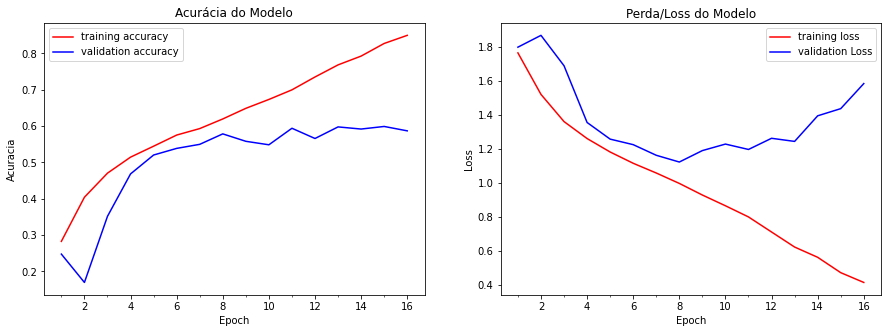

In [107]:
def plota_historico_modelo(historico_modelo):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(historico_modelo.history['accuracy'])+1),
                historico_modelo.history['accuracy'],'r')
    axs[0].plot(range(1,len(historico_modelo.history['val_accuracy'])+1),
                historico_modelo.history['val_accuracy'],'b')
    axs[0].set_title('Acurácia do Modelo')
    axs[0].set_ylabel('Acuracia')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(historico_modelo.history['accuracy'])+1),
                      len(historico_modelo.history['accuracy'])/10)
    axs[0].legend(['training accuracy', 'validation accuracy'], loc='best')

    axs[1].plot(range(1,len(historico_modelo.history['loss'])+1),
                historico_modelo.history['loss'],'r')
    axs[1].plot(range(1,len(historico_modelo.history['val_loss'])+1),
                historico_modelo.history['val_loss'],'b')
    axs[1].set_title('Perda/Loss do Modelo')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(historico_modelo.history['loss'])+1),
                      len(historico_modelo.history['loss'])/10)
    axs[1].legend(['training loss', 'validation Loss'], loc='best')
    fig.savefig('historico_modelo5.png')
    plt.show()

plota_historico_modelo(history)

###Acurácia do modelo

In [108]:
scores = model.evaluate(np.array(X_test), np.array(y_test), batch_size = batch_size)
scores
print('Acurácia: ' + str(scores[1]))
print('Erro: ' + str(scores[0]))

15/15 [==============================] - 0s 24ms/step - loss: 1.5634 - accuracy: 0.5988
Acurácia: 0.5987740159034729
Erro: 1.5634483098983765


## Matriz de confusão

In [109]:
true_y=[]
pred_y=[]
x = np.load('mod_xtest.npy')
y = np.load('mod_ytest.npy')
json_file = open(arquivo_modelo_json, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(arquivo_modelo)
y_pred= loaded_model.predict(x)
yp = y_pred.tolist()
yt = y.tolist()
count = 0
for i in range(len(y)):
    yy = max(yp[i])
    yyt = max(yt[i])
    pred_y.append(yp[i].index(yy))
    true_y.append(yt[i].index(yyt))
    if(yp[i].index(yy)== yt[i].index(yyt)):
        count+=1
acc = (count/len(y))*100
np.save('truey__mod01', true_y)
np.save('predy__mod01', pred_y)
print("Acurácia no conjunto de testes: "+str(acc)+"%")

Acurácia no conjunto de testes: 57.39760378935637%


## Gerando a Matriz de Confusão

In [110]:
from sklearn.metrics import confusion_matrix
y_true = np.load('truey__mod01.npy')
y_pred = np.load('predy__mod01.npy')
cm = confusion_matrix(y_true, y_pred)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]
titulo='Matriz de Confusão'
print(cm)

[[201   6  54  29  93  20  95]
 [ 11  12   8   4  15   1   1]
 [ 44   4 174  34 117  78  94]
 [ 19   1  26 708  46  31  50]
 [ 48   4  69  34 295   7 131]
 [ 10   1  44  27  11 294  27]
 [ 28   3  25  50 123   6 376]]


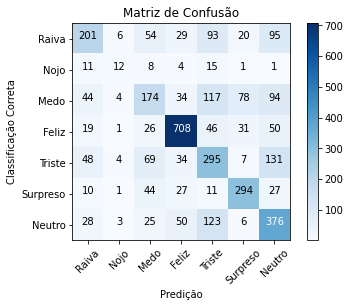

In [111]:
import itertools
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(titulo)
plt.colorbar()
tick_marks = np.arange(len(expressoes))
plt.xticks(tick_marks, expressoes, rotation=45)
plt.yticks(tick_marks, expressoes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Classificação Correta')
plt.xlabel('Predição')
plt.savefig('matriz_confusao_modelo5.png')
plt.show()

## Teste do Modelo1


In [112]:
imagem = cv2.imread('/content/TP_PDI/testes/teste1.jpg')
original = imagem.copy()
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

In [113]:
face_cascade = cv2.CascadeClassifier('/content/TP_PDI/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 3)

In [114]:
print('Número total de imagens no dataset: ', str(len(faces)))

Número total de imagens no dataset:  14


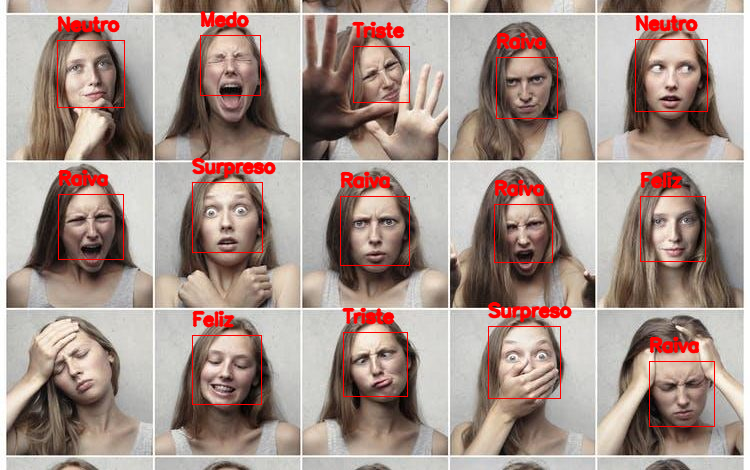

In [115]:
for (x, y, w, h) in faces:
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 1)
  roi_gray = gray[y:y + h, x:x + w]
  roi_gray = roi_gray.astype('float') / 255.0
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  prediction = loaded_model.predict(cropped_img)[0]
  cv2.putText(original, expressoes[int(np.argmax(prediction))], (x, y - 10),
              cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2, cv2.LINE_AA)

cv2_imshow(original)